In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import numpy as np
import sys
import os
from matplotlib import pyplot as plt
import pickle
from climtools import climtools_lib as ctl
from scipy import stats
import xarray as xr
import glob
import pymannkendall as mk

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
titlefont = 22
plt.rcParams['figure.titlesize'] = titlefont
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['legend.fontsize'] = 18

#############################################################################

cart_out = '/home/fabiano/Research/lavori/BOTTINO/nonlin_evol_1000/'

colors = ['black', 'royalblue', 'lightslategray', 'forestgreen', 'orange', 'chocolate', 'maroon', 'violet', 'crimson']
allru = ['pi', 'hist', 'b990', 'b025', 'b050', 'b065', 'b080', 'b100', 'ssp585']

No DISPLAY variable set. Switching to agg backend


In [2]:
colok = ['black', 'lightslategray', 'forestgreen', 'orange', 'chocolate', 'maroon', 'violet']
allruk = ['pi', 'b990', 'b025', 'b050', 'b065', 'b080', 'b100']

In [3]:
cart_in = '/home/fabiano/Research/lavori/BOTTINO/seasmean/'

glomeans_500, pimean = pickle.load(open(cart_in + 'bottino_glomeans.p', 'rb'))
glomeans_500_srf, pimean_srf = pickle.load(open(cart_in + 'bottino_glomeans_srf.p', 'rb'))

In [4]:
%matplotlib inline

- Error in grid interpolation (xarray) for net_toa in b990 (rsdt)

In [5]:
###
cart_run = '/home/fabiano/Research/git/ece_runtime/run/'
masfi = cart_run + 'masks.nc'
cose = xr.load_dataset(masfi)
land_mask = ~cose['RnfA.msk'].values.astype('bool') # 1 over land

In [6]:
tas = xr.open_dataset('/nas/BOTTINO/irods_data/stabilization-ssp585-2100/r1i1p1f1/Amon/tas/tas_Amon_EC-Earth3_stabilization-ssp585-2100_r1i1p1f1_gr_309801-309812.nc')

/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [7]:
dims = tuple(['lat', 'lon'])
coords = dict([('lat', tas.lat), ('lon', tas.lon)])
omask = xr.Dataset(data_vars=dict(omask = (dims, ~land_mask)), coords = coords)

In [8]:
omask = omask['omask']

In [9]:
fil = '/home/fabiano/Research/lavori/BOTTINO/Goutorbe_ghflux.nc'
fgh = xr.load_dataset(fil)

In [10]:
omask_ok = ctl.regrid_dataset(omask, regrid_to_reference = fgh)

Regridding...
Regridding completed in 0:00:02.360671


Adding cyclic point



<GeoAxesSubplot:>

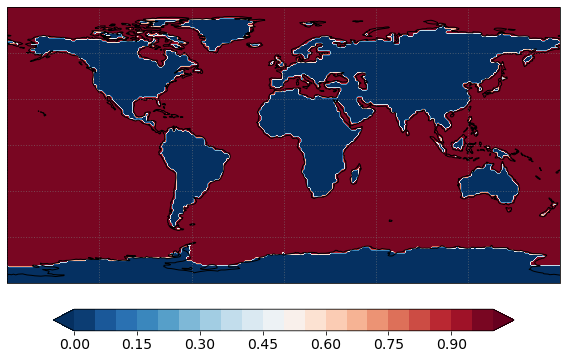

In [11]:
ctl.plot_map_contour(omask_ok.astype(float))

In [16]:
fgh

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 180, time: 1)
Coordinates:
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * time     (time) float64 1.0
Data variables:
    gh_flux  (time, lat, lon) float32 72.0 72.1 73.2 72.0 ... 59.7 59.6 59.6
Attributes:
    CDI:          Climate Data Interface version 1.3.2
    Conventions:  CF-1.0
    history:      Sat Jun 30 13:45:03 2012: cdo add energys2.nc temp1.nc temp...
    About:        File created by SOSIE interpolation environement, Laurent B...
    CDO:          Climate Data Operators version 1.3.2 (http://www.mpimet.mpg...
    ece-comment:  From SHACONEMO INPUTS_ORCA1_LIM3_PISCES_V9/INPUTS_ORCA025_L...
    ece-origin:   UFla (SMHI) for EC-Earth

In [18]:
from importlib import reload

In [19]:
reload(ctl)

No DISPLAY variable set. Switching to agg backend


<module 'climtools.climtools_lib' from '/home/fabiano/Research/git/ClimTools/climtools/climtools_lib.py'>

In [12]:
fgh_glob = ctl.global_mean(fgh['gh_flux'], mask = omask_ok).compute()

In [13]:
# units are mW/m2
fgh_glob = fgh_glob/1000.

In [7]:
# cart_prsn_pi = '/nas/BOTTINO/CMIP6/LongRunMIP/EC-Earth-Consortium/EC-Earth3/piControl/r1i1p1f1/Amon/prsn/'

# coso = xr.open_mfdataset(cart_prsn_pi + 'prsn*nc', use_cftime = True, preprocess=ctl.roundlat)['prsn']

# ru = 'pi'

# glomean_oce = ctl.global_mean(coso, mask = ~land_mask).compute()
# glomean_land = ctl.global_mean(coso, mask = land_mask).compute()
# cosoglo = ctl.global_mean(coso).compute()

# prsn[ru] = cosoglo
# prsn[(ru, 'oce')] = glomean_oce
# prsn[(ru, 'land')] = glomean_land

# prsn[ru] = prsn[ru].groupby('time.year').mean().compute()
# prsn[(ru, 'oce')] = prsn[(ru, 'oce')].groupby('time.year').mean().compute()
# prsn[(ru, 'land')] = prsn[(ru, 'land')].groupby('time.year').mean().compute()

# pickle.dump(prsn, open('/home/fabiano/Research/lavori/BOTTINO/nonlin_evol_1000/prsn_all.p', 'wb'))

In [27]:
fgh_glob

<xarray.DataArray 'gh_flux' (time: 1)>
array([0.06561699], dtype=float32)
Coordinates:
  * time     (time) float64 1.0

In [14]:
cart_oce = '/home/fabiano/Research/lavori/BOTTINO/ocean3d/'

oce_mass = 1.381107e+21 # global and vertical sum of masscello*areacello
#ml_mass = 3.7352024e+19 # first 100 m globally
#bulk_mass = 1.3436264e+21 # below 100 m globally
ml_mass = 5.595727e+19 # first 150 m
bulk_mass = 7.689922e+20 # btw 150 and 2500 m
oce_area = 3.6481962e+14 # m2
cp0 = 3989.245 # J/kg/K

ysec = 60*60*24*365

In [15]:
R_earth = 6.3781e6 # m
oce_frac = oce_area/(4*np.pi*R_earth**2)

In [16]:
oce_frac

0.713650664310986

In [17]:
oht_all = pickle.load(open(cart_oce + 'oht_ts_deep.p', 'rb'))

In [18]:
oht_all[('pi', 'tot')] = oht_all[('pi', 700)] + oht_all[('pi', 2000)] + oht_all[('pi', 'deep')]

In [19]:
for ru in allruk:
    oht_all[(ru, 'surf_flux')] = np.gradient(oht_all[(ru, 'tot')])/oce_area/ysec

In [20]:
cart_in = '/home/fabiano/Research/lavori/BOTTINO/seasmean/'
gogo = pickle.load(open(cart_in + 'bottino_glomeans_1000.p', 'rb'))
glomeans, pimean = gogo

prsn = pickle.load(open('/home/fabiano/Research/lavori/BOTTINO/nonlin_evol_1000/prsn_all.p', 'rb'))

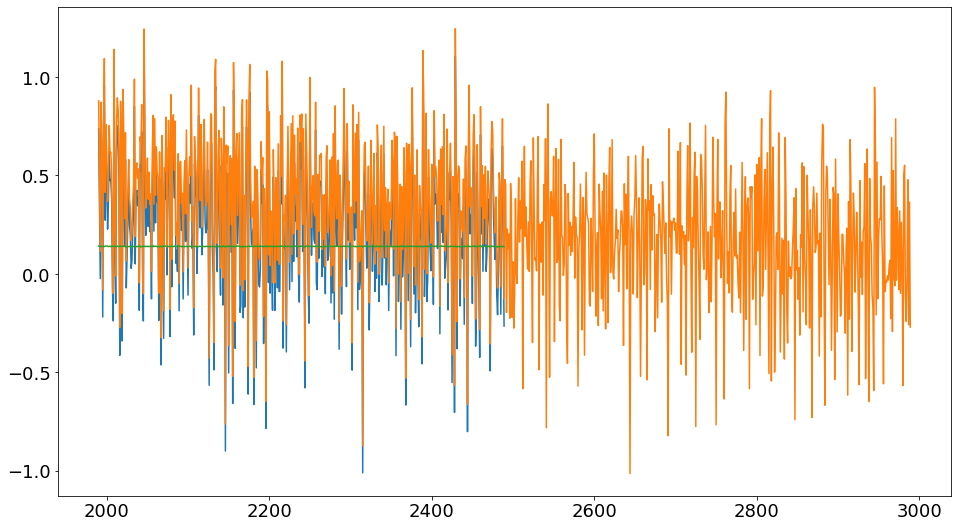

In [37]:
plt.figure(figsize=(16,9))

plt.plot(glomeans_500[('b990', 'net_toa')][0], glomeans_500[('b990', 'net_toa')][1])
plt.plot(glomeans[('b990', 'net_toa')][0], glomeans[('b990', 'net_toa')][1])

plt.plot(glomeans[('b990', 'net_toa')][0][:500], glomeans[('b990', 'net_toa')][1][:500]-glomeans_500[('b990', 'net_toa')][1])

In [38]:
prsn.keys()

dict_keys(['b990', ('b990', 'oce'), ('b990', 'land'), 'b025', ('b025', 'oce'), ('b025', 'land'), 'b050', ('b050', 'oce'), ('b050', 'land'), 'b065', ('b065', 'oce'), ('b065', 'land'), 'b080', ('b080', 'oce'), ('b080', 'land'), 'b100', ('b100', 'oce'), ('b100', 'land'), 'pi', ('pi', 'oce'), ('pi', 'land')])

In [39]:
%matplotlib inline

In [40]:
from importlib import reload
reload(ctl)

libgfortran.so.3: cannot open shared object file: No such file or directory
No DISPLAY variable set. Switching to agg backend


<module 'climtools_lib' from '/home/fabiano/Research/git/ClimTools/climtools_lib.py'>

- Reconstruct b990 net_toa without interpolation error

In [21]:
glomeans[('b990', 'net_toa')][1][:500] = glomeans_500[('b990', 'net_toa')][1]

In [22]:
glomeans[('pi', 'net_srf')] = glomeans_500_srf[('pi', 'net_srf')]
glomeans[('pi', 'net_srf', 'oce')] = glomeans_500_srf[('pi', 'net_srf', 'oce')]
glomeans[('pi', 'net_srf', 'land')] = glomeans_500_srf[('pi', 'net_srf', 'land')]

In [23]:
oht_all[('pi', 'tot')] = np.append(oht_all[('pi', 'tot')], oht_all[('pi', 'tot')][-1])

In [44]:
# cart_snm = '/home/fabiano/work_big/cineka_bkp_0923/stabilization-*{}/r1i1p1f1/LImon/snm/'

# snm = dict()
# for ru in allru[2:-1]:
#     print(ru)
#     print(cart_snm.format(ru[-3:]))
#     coso = xr.open_mfdataset(cart_snm.format(ru[-3:]) + 'snm*nc', use_cftime = True, preprocess=ctl.roundlat)['snm']
#     cosoyr = coso.groupby('time.year').mean().compute()
    
#     cosoglo = ctl.global_mean(cosoyr)
#     cosoglo_oce = ctl.global_mean(cosoyr, mask = ~land_mask)
#     cosoglo_land = ctl.global_mean(cosoyr, mask = land_mask)

#     snm[ru] = cosoglo.compute()
#     snm[(ru, 'oce')] = cosoglo_oce.compute()
#     snm[(ru, 'land')] = cosoglo_land.compute()

# for ke in snm:
#     if 'b990' in ke: # missing year in b990
#         snm[ke] = np.append(snm[ke], snm[ke][-1])

# pickle.dump(snm, open(cart_out + 'snm_all.p', 'wb'))

In [24]:
snm = pickle.load(open(cart_out + 'snm_all.p', 'rb'))

In [25]:
snm.keys()

dict_keys(['b990', ('b990', 'oce'), ('b990', 'land'), 'b025', ('b025', 'oce'), ('b025', 'land'), 'b050', ('b050', 'oce'), ('b050', 'land'), 'b065', ('b065', 'oce'), ('b065', 'land'), 'b080', ('b080', 'oce'), ('b080', 'land'), 'b100', ('b100', 'oce'), ('b100', 'land'), 'pi', ('pi', 'oce'), ('pi', 'land')])

In [28]:
colok


['black',
 'lightslategray',
 'forestgreen',
 'orange',
 'chocolate',
 'maroon',
 'violet']

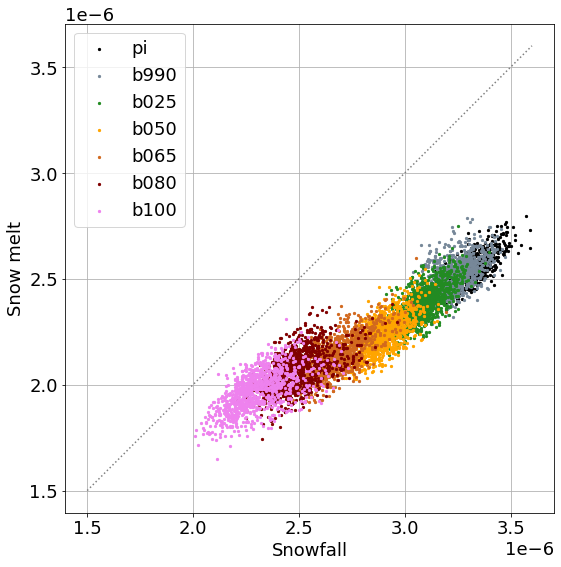

In [43]:
fig, ax = plt.subplots(figsize = (16,9))
for ru, col in zip(allruk, colok):
    ax.scatter(prsn[(ru, 'land')], snm[(ru, 'land')], color = col, label = ru, s = 5)
ax.set_aspect('equal')#, adjustable='box')
plt.plot(np.linspace(1.5e-6, 3.6e-6, 100), np.linspace(1.5e-6, 3.6e-6, 100), ls = ':', color = 'grey')
ax.grid()
ax.set_ylabel('Snow melt')
ax.set_xlabel('Snowfall')
plt.legend()

fig.savefig(cart_out + 'check_snfall_snmelt.pdf')

In [47]:
# cart_snm_pi = '/nas/BOTTINO/CMIP6/LongRunMIP/EC-Earth-Consortium/EC-Earth3/piControl/r1i1p1f1/LImon/snm/'

# coso = xr.open_mfdataset(cart_snm_pi + 'snm*nc', use_cftime = True, preprocess=ctl.roundlat)['snm']

# ru = 'pi'

# glomean_oce = ctl.global_mean(coso, mask = ~land_mask).compute()
# glomean_land = ctl.global_mean(coso, mask = land_mask).compute()
# cosoglo = ctl.global_mean(coso).compute()

# snm[ru] = cosoglo.groupby('time.year').mean().compute()
# snm[(ru, 'oce')] = glomean_oce.groupby('time.year').mean().compute()
# snm[(ru, 'land')] = glomean_land.groupby('time.year').mean().compute()

# pickle.dump(snm, open(cart_out + 'snm_all.p', 'wb'))

In [48]:
for ye in glomeans[(ru, 'net_srf')][0]:
    if ye not in prsn[(ru, 'oce')].year:
        print(ye)
        print('bua')
    if ye not in snm[(ru, 'land')].year:
        print(ye)
        print('guuuuu')

2757
bua


In [49]:
for ye in prsn[(ru, 'oce')].year:
    if np.sum(prsn[(ru, 'oce')].year == ye) > 1:
        print(ye)

<xarray.DataArray 'year' ()>
array(2756)
Coordinates:
    year     int64 2756
<xarray.DataArray 'year' ()>
array(2756)
Coordinates:
    year     int64 2756


In [45]:
ru = 'b100'
prsn[ru]['year'] = snm[ru].year
prsn[(ru, 'oce')]['year'] = snm[ru].year
prsn[(ru, 'land')]['year'] = snm[ru].year

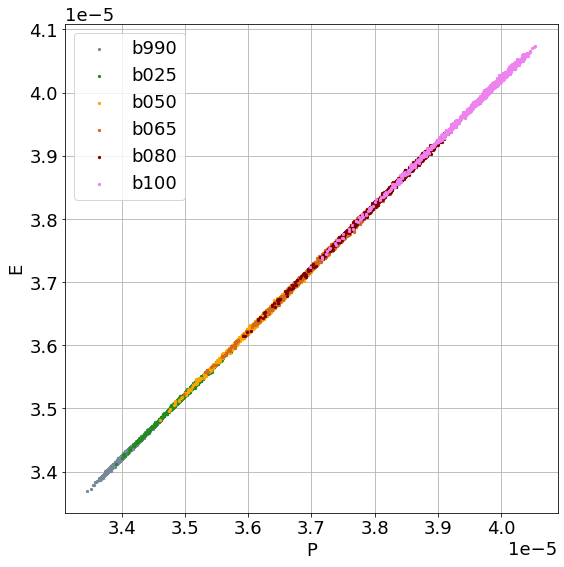

In [66]:
Lv = 2.5e6
fig, ax = plt.subplots(figsize = (16,9))
for ru, col in zip(allruk[1:], colok[1:]):
    ax.scatter(glomeans[(ru, 'pr')][1], glomeans[(ru, 'hfls')][1]/Lv, color = col, label = ru, s = 5)
ax.set_aspect('equal')#, adjustable='box')
#plt.plot(np.linspace(1.5e-6, 3.6e-6, 100), np.linspace(1.5e-6, 3.6e-6, 100), ls = ':', color = 'grey')
ax.grid()
ax.set_ylabel('E')
ax.set_xlabel('P')
plt.legend()

#fig.savefig(cart_out + 'check_snfall_snmelt.pdf')

# plt.plot(glomeans[('b100', 'pr')][0], glomeans[('b100', 'pr')][1])
# plt.plot(glomeans[('b100', 'hfls')][0], glomeans[('b100', 'hfls')][1]/Lv)

In [69]:
glomeans[('pi', 'tas')]

(array([2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028,
        2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039,
        2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050,
        2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061,
        2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072,
        2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083,
        2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094,
        2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105,
        2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116,
        2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127,
        2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138,
        2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149,
        2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160,
        2161, 2162, 2163, 2164, 2165, 

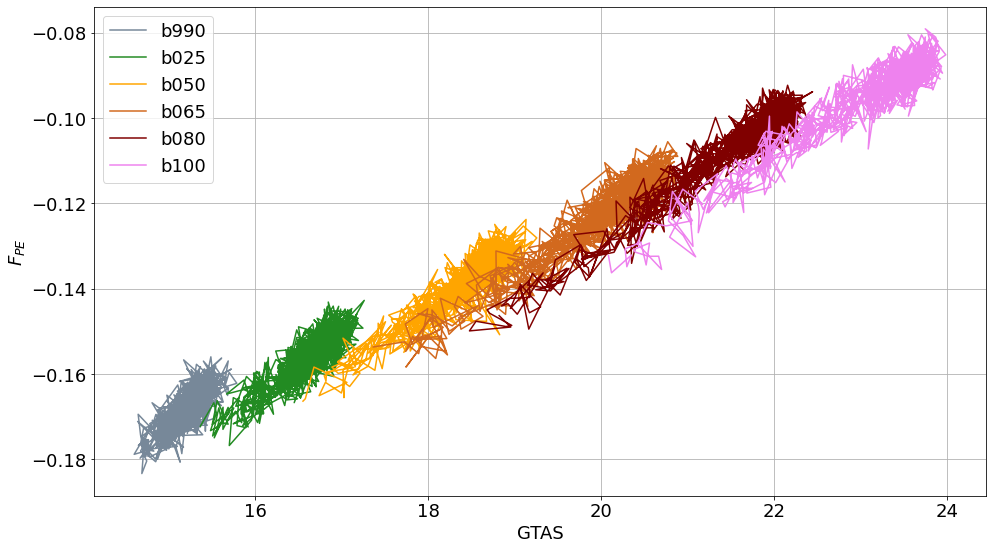

In [89]:
Lv = 2.515e6
cl = 4.186e3
cs = 2.09e3
Tp = 15.
Tsnow = -10.

fig, ax = plt.subplots(figsize = (16,9))
for ru, col in zip(allruk[1:], colok[1:]):
    P = glomeans[(ru, 'pr')][1]
    E = P#glomeans[(ru, 'hfls')][1]/Lv
    Psnow = prsn[ru]
    Ts = glomeans[(ru, 'tas')][1] - 273
    Tp = Ts

    Fpe = cl * Tp * (P-Psnow) + cs * Tsnow * Psnow - cl * Ts * E
    plt.plot(Ts, Fpe, color = col, label = ru)
    #ax.scatter(glomeans[(ru, 'pr')][1], glomeans[(ru, 'hfls')][1]/Lv, color = col, label = ru, s = 5)
#ax.set_aspect('equal')#, adjustable='box')
#plt.plot(np.linspace(1.5e-6, 3.6e-6, 100), np.linspace(1.5e-6, 3.6e-6, 100), ls = ':', color = 'grey')
ax.grid()
ax.set_ylabel(r'$F_{PE}$')
ax.set_xlabel('GTAS')
plt.legend()

In [55]:
fgh_glob.values

array([0.06561699], dtype=float32)

pi
array split does not result in an equal division
array split does not result in an equal division
array split does not result in an equal division
array split does not result in an equal division
array split does not result in an equal division
final net toa:   0.02 +/-   0.02
atm imb (with snow melt over land):  -0.30 +/-   0.01
atm imb (with snowfall):  -0.22 +/-   0.01
array split does not result in an equal division
array split does not result in an equal division
array split does not result in an equal division
array split does not result in an equal division
oce imb:   0.48 +/-   0.02
b990
final net toa:   0.14 +/-   0.01
atm imb (with snow melt over land):  -0.34 +/-   0.01
atm imb (with snowfall):  -0.27 +/-   0.01
oce imb:   0.48 +/-   0.03
b025
final net toa:   0.23 +/-   0.02
atm imb (with snow melt over land):  -0.39 +/-   0.01
atm imb (with snowfall):  -0.32 +/-   0.01
oce imb:   0.49 +/-   0.03
b050
final net toa:   0.22 +/-   0.03
atm imb (with snow melt over land):  

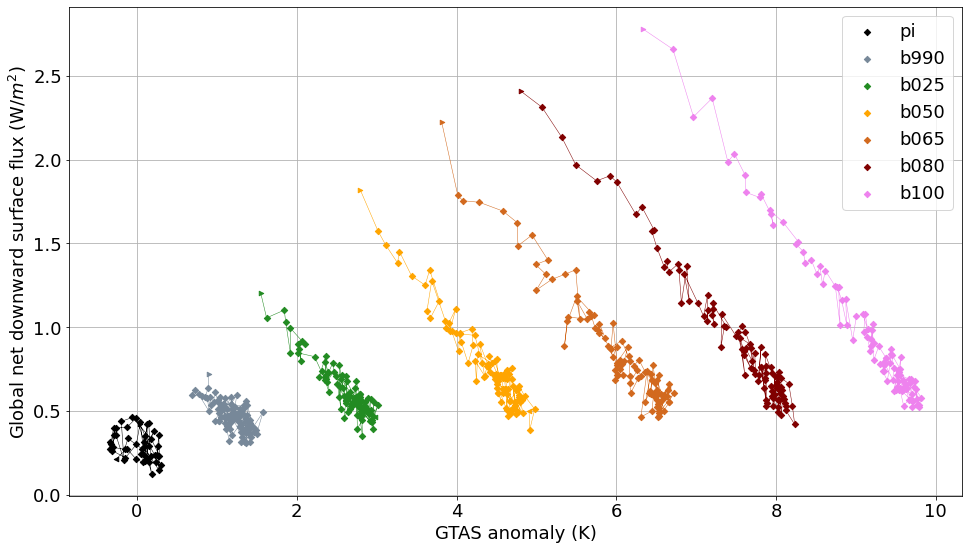

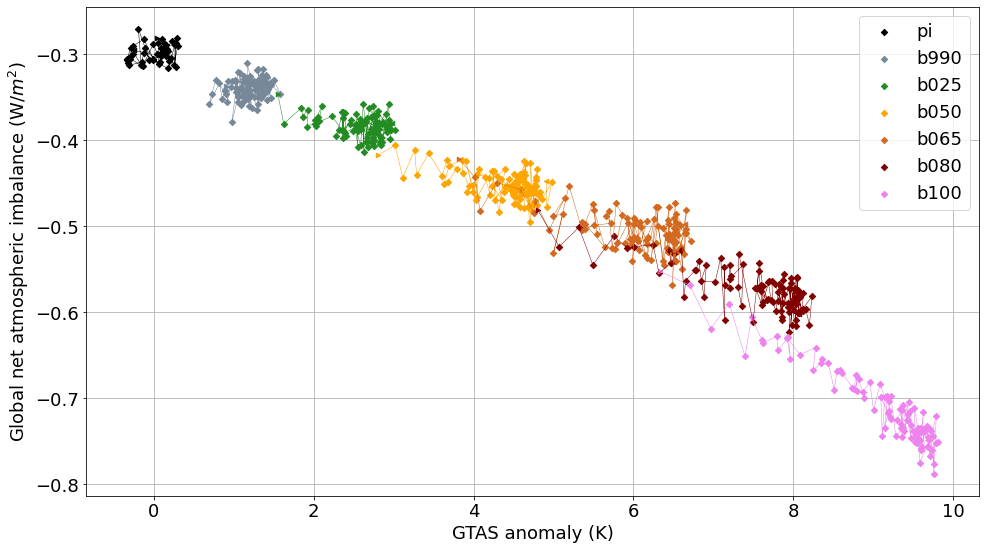

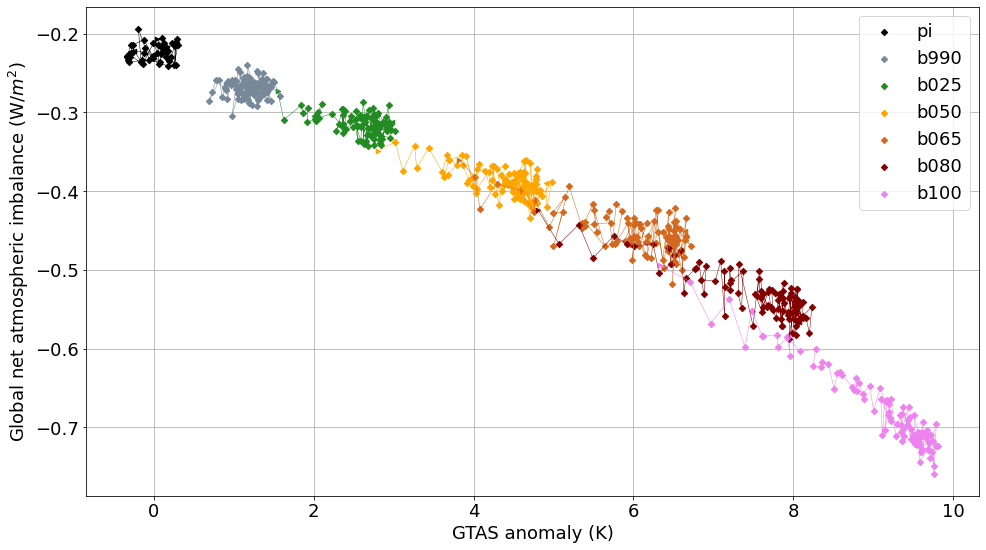

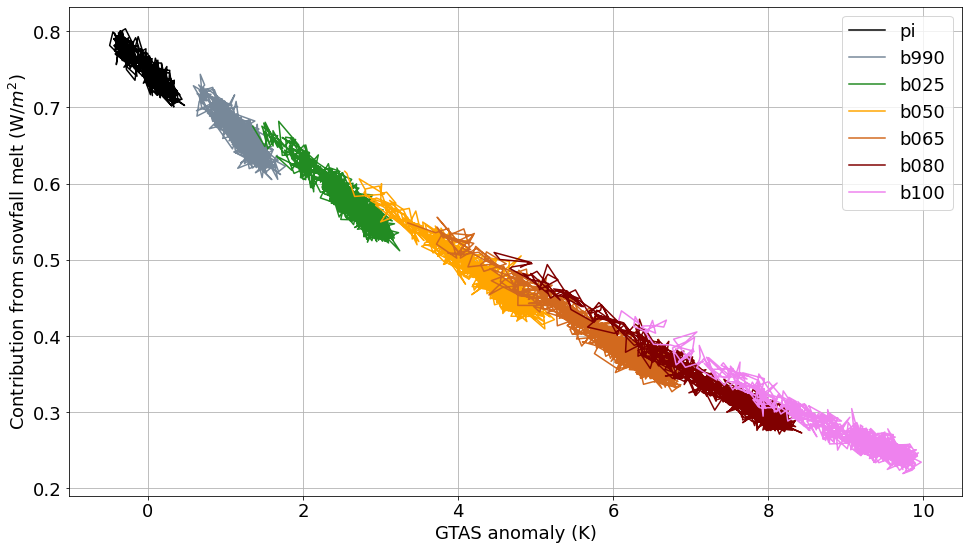

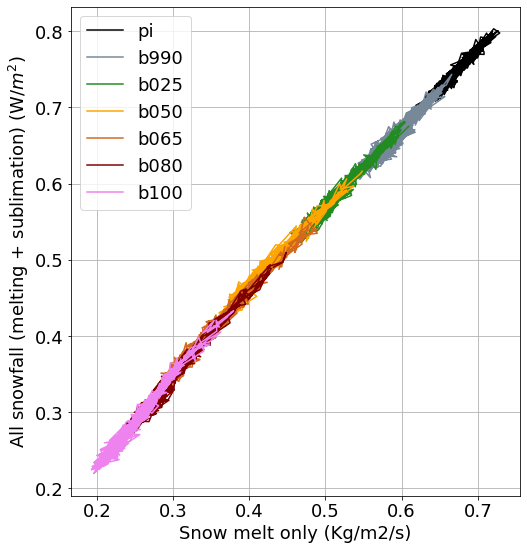

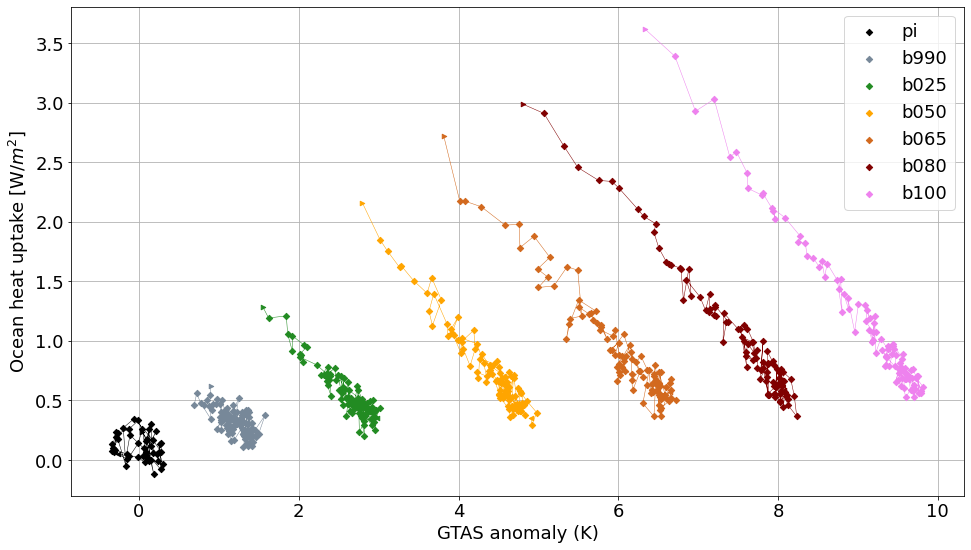

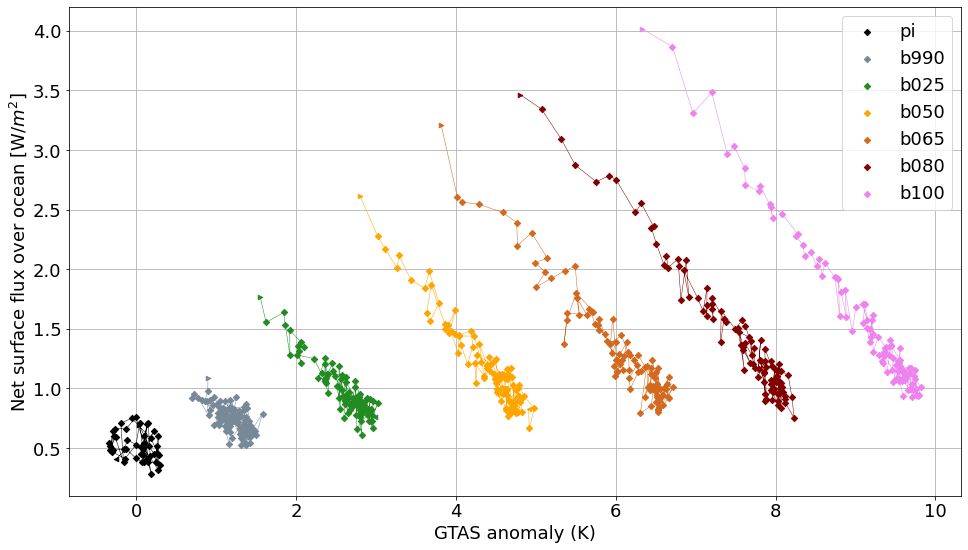

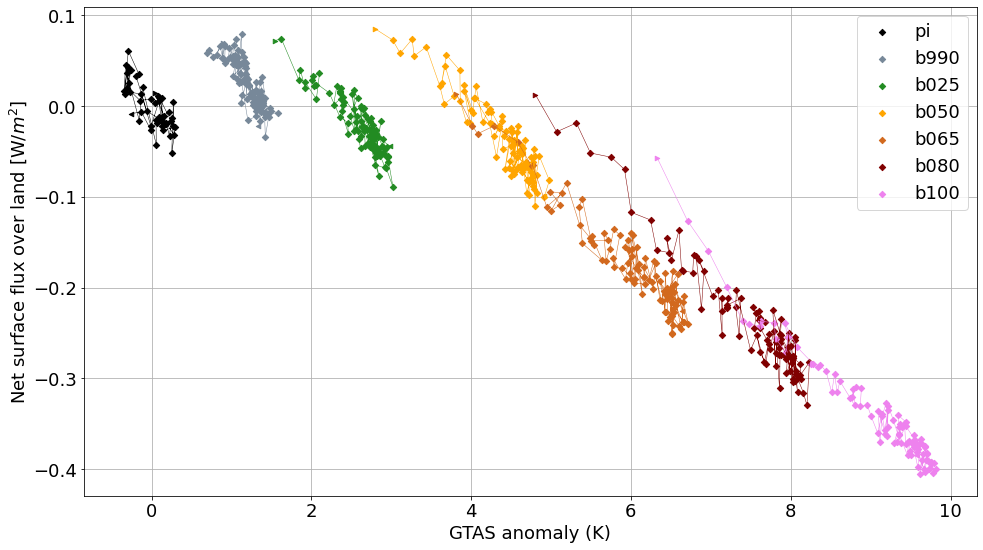

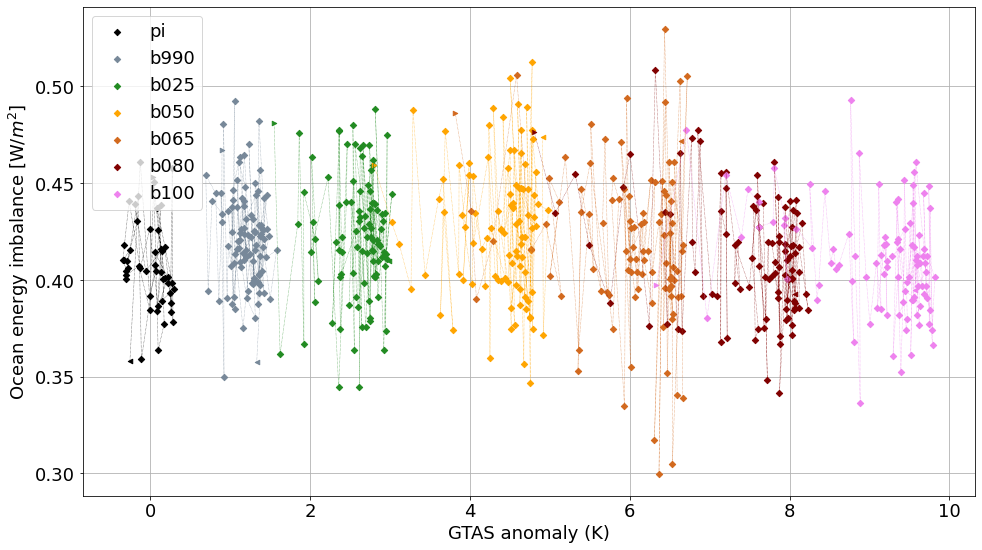

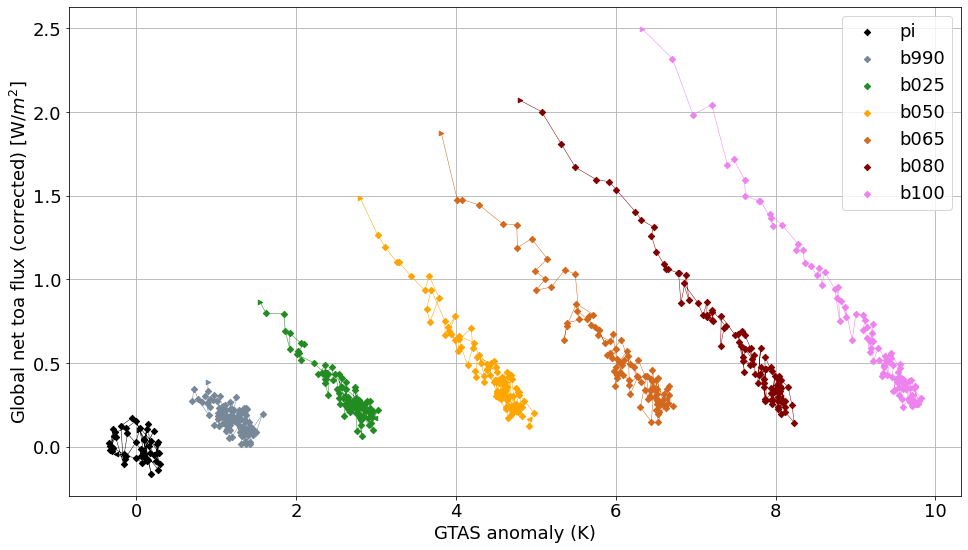

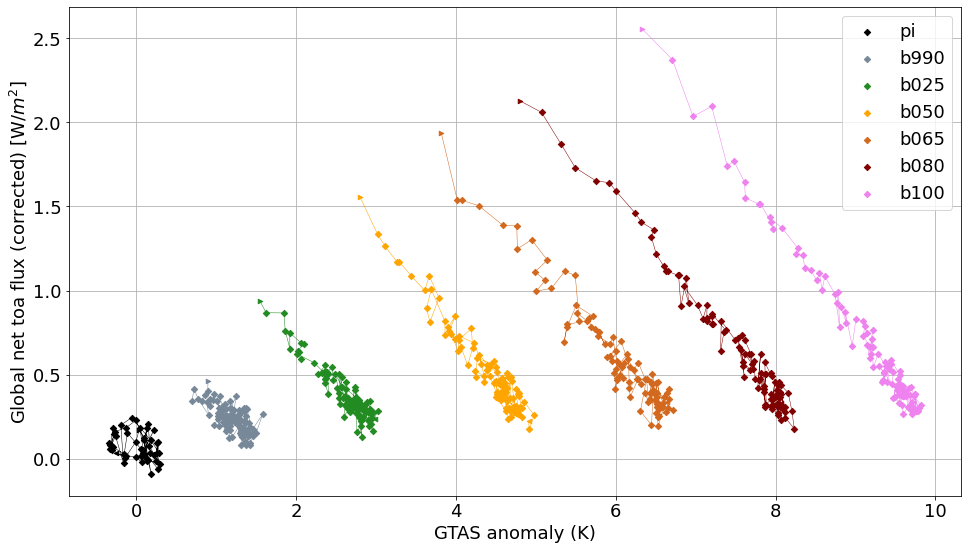

In [47]:
fluxes = dict()

fig_greg_srf, ax_greg_srf = plt.subplots(figsize = (16,9))
fig_greg_inatm, ax_greg_inatm = plt.subplots(figsize = (16,9))
fig_greg_inatm_snfall, ax_greg_inatm_snfall = plt.subplots(figsize = (16,9))
fig_prsn, ax_prsn = plt.subplots(figsize = (16,9))
fig_snm, ax_snm = plt.subplots(figsize = (16,9))

fig_sflux, ax_sflux = plt.subplots(figsize = (16,9))
fig_surf_oce, ax_surf_oce = plt.subplots(figsize = (16,9))
fig_surf_land, ax_surf_land = plt.subplots(figsize = (16,9))
fig_nemo, ax_nemo = plt.subplots(figsize = (16,9))

fig_toa_corr, ax_toa_corr = plt.subplots(figsize = (16,9))

fig_toa_snm, ax_toa_snm = plt.subplots(figsize = (16,9))

atm_imbs = []
atm_imbs_snfall = []
oce_imbs = []
ntos = []

for ru, col in zip(allruk, colok):
    print(ru)
    #if (ru, 'net_toa') in glomeans:
    #    ctl.gregplot_on_ax(ax_greg, tas_anom, glomeans[(ru, 'net_toa')][1], color = col, label = ru, calc_ERF = False, calc_ECS = False, nyea = 10, point_dim = 20)
    netsrf = glomeans[(ru, 'net_srf')][1] - prsn[ru]*334000
    netsrf_oce = glomeans[(ru, 'net_srf', 'oce')][1] - prsn[(ru, 'oce')]*334000
    netsrf_land = glomeans[(ru, 'net_srf', 'land')][1] - prsn[(ru, 'land')]*334000
    net_toa = glomeans[(ru, 'net_toa')][1]
    netsrf_snm = glomeans[(ru, 'net_srf')][1] - oce_frac*prsn[(ru, 'oce')]*334000 - (1-oce_frac) * snm[(ru, 'land')]*334000
    netsrf_land_snm = glomeans[(ru, 'net_srf', 'land')][1] - snm[(ru, 'land')]*334000

    if len(netsrf) == 501:
        netsrf = netsrf[:500]
        netsrf_oce = netsrf_oce[:500]
        netsrf_land = netsrf_land[:500]
        net_toa = net_toa[:500]
        netsrf_snm = netsrf_snm[:500]
        netsrf_land_snm = netsrf_land_snm[:500]

    tas_anom = glomeans[(ru, 'tas')][1] - pimean['tas']

    oce_imb = netsrf_oce-oht_all[(ru, 'surf_flux')]

    ####

    ax_prsn.plot(tas_anom, prsn[ru]*334000., color = col, label = ru)
    ax_snm.plot((oce_frac*prsn[(ru, 'oce')] + (1-oce_frac) * snm[(ru, 'land')])*334000, prsn[ru]*334000., color = col, label = ru)

    ctl.gregplot_on_ax(ax_greg_srf, tas_anom, netsrf, color = col, label = ru, calc_ERF = False, calc_ECS = False, nyea = 10, point_dim = 20)#, ylim = (0., None))

    ctl.gregplot_on_ax(ax_toa_corr, tas_anom, netsrf-oce_frac*oce_imb, color = col, label = ru, calc_ERF = False, calc_ECS = False, nyea = 10, point_dim = 20)#, ylim = (0., None))
    
    ctl.gregplot_on_ax(ax_toa_snm, tas_anom, netsrf_snm-oce_frac*oce_imb, color = col, label = ru, calc_ERF = False, calc_ECS = False, nyea = 10, point_dim = 20)#, ylim = (0., None))

    ctl.gregplot_on_ax(ax_greg_inatm, tas_anom, net_toa-netsrf_snm, color = col, label = ru, calc_ERF = False, calc_ECS = False, nyea = 10, point_dim = 20)#, ylim = (0., None))
    ctl.gregplot_on_ax(ax_greg_inatm_snfall, tas_anom, net_toa-netsrf, color = col, label = ru, calc_ERF = False, calc_ECS = False, nyea = 10, point_dim = 20)#, ylim = (0., None))


    fluxes[(ru, 'tas')] = tas_anom
    fluxes[(ru, 'net_toa')] = net_toa
    fluxes[(ru, 'net_toa_corr')] = netsrf_snm - oce_frac*oce_imb
    fluxes[(ru, 'net_srf_oce')] = oht_all[(ru, 'surf_flux')]
    fluxes[(ru, 'atm_imb')] = net_toa - netsrf_snm
    fluxes[(ru, 'atm_imb_snfall')] = net_toa - netsrf
    fluxes[(ru, 'oce_imb')] = netsrf_oce - oht_all[(ru, 'surf_flux')]

    nto = fluxes[(ru, 'net_toa_corr')][-30:].values
    ntos.append(np.mean(nto))
    print('final net toa: {:6.2f} +/- {:6.2f}'.format(np.mean(nto), np.std(nto)/10))

    imb = (net_toa-netsrf_snm)[-100:].values
    atm_imbs.append(np.mean(imb))
    print('atm imb (with snow melt over land): {:6.2f} +/- {:6.2f}'.format(np.mean(imb), np.std(imb)/10))
    imb_snfall = (net_toa-netsrf)[-100:].values
    atm_imbs_snfall.append(np.mean(imb_snfall))
    print('atm imb (with snowfall): {:6.2f} +/- {:6.2f}'.format(np.mean(imb_snfall), np.std(imb_snfall)/10))

    ctl.gregplot_on_ax(ax_sflux, tas_anom, oht_all[(ru, 'surf_flux')], color = col, label = ru, calc_ERF = False, calc_ECS = False, nyea = 10, point_dim = 20)#, ylim = (0., None))

    ctl.gregplot_on_ax(ax_surf_oce, tas_anom, netsrf_oce, color = col, label = ru, calc_ERF = False, calc_ECS = False, nyea = 10, point_dim = 20, ls = '-')#, label = 'net surf tot + snow')#, ylim = (0., None))

    ctl.gregplot_on_ax(ax_surf_land, tas_anom, netsrf_land_snm, color = col, label = ru, calc_ERF = False, calc_ECS = False, nyea = 10, point_dim = 20, ls = '-')#, label = 'net surf tot + snow')#, ylim = (0., None))

    ctl.gregplot_on_ax(ax_nemo, tas_anom, netsrf_oce-oht_all[(ru, 'surf_flux')], color = col, label = ru, calc_ERF = False, calc_ECS = False, nyea = 10, point_dim = 20, ls = ':')#, label = 'net surf oce (no snow)', ylim = (0., None))
    
    imb = (netsrf_oce+fgh_glob.values-oht_all[(ru, 'surf_flux')])[-100:].values
    oce_imbs.append(np.mean(imb))
    print('oce imb: {:6.2f} +/- {:6.2f}'.format(np.mean(imb), np.std(imb)/10))

print((7*'{:6.2f} & ').format(*atm_imbs))
print((7*'{:6.2f} & ').format(*atm_imbs_snfall))
print((7*'{:6.2f} & ').format(*oce_imbs))
print((7*'{:6.2f} & ').format(*ntos))

pickle.dump(fluxes, open(cart_out + 'fluxes_all.p', 'wb'))
    
for ax in [ax_prsn, ax_greg_srf, ax_greg_inatm, ax_greg_inatm_snfall, ax_nemo, ax_sflux, ax_surf_oce, ax_surf_land, ax_toa_corr, ax_toa_snm]:
    ax.legend()
    ax.grid()
    ax.set_xlabel('GTAS anomaly (K)')

ax = ax_snm
ax.legend()
ax.grid()
ax.set_aspect('equal', 'box')
ax.set_xlabel('Snow melt only (Kg/m2/s)')

ax_prsn.set_ylabel(r'Contribution from snowfall melt (W/$m^2$)')
ax_snm.set_ylabel(r'All snowfall (melting + sublimation) (W/$m^2$)')

ax_greg_srf.set_ylabel(r'Global net downward surface flux (W/$m^2$)')
ax_greg_inatm.set_ylabel(r'Global net atmospheric imbalance (W/$m^2$)')
ax_greg_inatm_snfall.set_ylabel(r'Global net atmospheric imbalance (W/$m^2$)')


ax_sflux.set_ylabel(r'Ocean heat uptake [W/$m^2$]')
ax_surf_oce.set_ylabel(r'Net surface flux over ocean [W/$m^2$]')
ax_surf_land.set_ylabel(r'Net surface flux over land [W/$m^2$]')
ax_nemo.set_ylabel(r'Ocean energy imbalance [W/$m^2$]')

ax_toa_corr.set_ylabel(r'Global net toa flux (corrected) [W/$m^2$]')
ax_toa_snm.set_ylabel(r'Global net toa flux (corrected) [W/$m^2$]')

fig_prsn.savefig(cart_out + 'bottino_prsn_1000.pdf')
fig_prsn.savefig(cart_out + 'bottino_snm_vs_prsn_1000.pdf')
fig_greg_srf.savefig(cart_out + 'bottino_gregory_1000_srf_w_prsn.pdf')
fig_greg_inatm.savefig(cart_out + 'bottino_gregory_1000_inatm_w_prsn.pdf')
fig_greg_inatm_snfall.savefig(cart_out + 'bottino_gregory_1000_inatm_w_prsn_snfall.pdf')

fig_sflux.savefig(cart_out + 'bottino_1000_ocean_uptake_bigthetao.pdf')
fig_surf_oce.savefig(cart_out + 'bottino_1000_netsrf_ocean.pdf')
fig_surf_land.savefig(cart_out + 'bottino_1000_netsrf_land.pdf')

fig_nemo.savefig(cart_out + 'bottino_1000_nemoimb.pdf')

fig_toa_corr.savefig(cart_out + 'bottino_gregory_nettoa_corr.pdf')
fig_toa_snm.savefig(cart_out + 'bottino_gregory_nettoa_corr_snm.pdf')


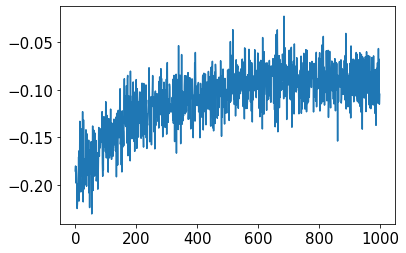

In [52]:
plt.plot(netsrf_land-netsrf_land_snm)

In [53]:
for ke in glomeans: 
    if 'net_srf' in ke: 
        print(ke)

('b990', 'net_srf')
('b990', 'net_srf', 'oce')
('b990', 'net_srf', 'land')
('b025', 'net_srf')
('b025', 'net_srf', 'oce')
('b025', 'net_srf', 'land')
('b050', 'net_srf')
('b050', 'net_srf', 'oce')
('b050', 'net_srf', 'land')
('b065', 'net_srf')
('b065', 'net_srf', 'oce')
('b065', 'net_srf', 'land')
('b080', 'net_srf')
('b080', 'net_srf', 'oce')
('b080', 'net_srf', 'land')
('b100', 'net_srf')
('b100', 'net_srf', 'oce')
('b100', 'net_srf', 'land')
('pi', 'net_srf')
('pi', 'net_srf', 'oce')
('pi', 'net_srf', 'land')
